## Статистический анализ данных 

**Заказчик**

Сервис аренды самокатов "GoFast"

**Входные данные**

Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. 
Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
- **без подписки:**
    - абонентская плата отсутствует;
    - стоимость одной минуты поездки — 8 рублей;
    - стоимость старта (начала поездки) — 50 рублей;
- **с подпиской Ultra:**
     - абонентская плата — 199 рублей в месяц;
     - стоимость одной минуты поездки — 6 рублей;
     - стоимость старта — бесплатно.


**Описание данных**

В основных `данных` есть информация о пользователях, их поездках и подписках.

**Пользователи**

- `user_id`- уникальный идентификатор пользователя;
- `name` - имя пользователя
- `age` - возраст
- `city` - город
- `subscription_type` - тип подписки (free, ultra)

**Поездки**

- `user_id` - уникальный идентификатор пользователя
- `distance` - расстояние, которое пользователь проехал в текущей сессии (в метрах)
- `duration` - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
- `date` - дата совершения поездки

**Подписки**

- `subscription_type` - тип подписки
- `minute_price` - стоимость одной минуты поездки по данной подписке
- `start_ride_price` - стоимость начала поездки
- `subscription_fee` - стоимость ежемесячного платежа

## Структура проекта

[Шаг 1. Загрузка данных](#s1p1)
   
   * [1.1 Пользователи](#s1p2)
   * [1.2 Поездки](#s1p3)
   * [1.3 Подписки](#s1p4)
   * [Вывод по общей информации](#s1p5)
  
[Шаг 2. Предобработка данных](#s2p1)
   * [2.1 Дубликаты](#s2p2)
   * [2.2 Изменение типов данных и создание новых столбцов](#s2p3)
   * [Вывод по предобработке данных](#s2p4)
   
[Шаг 3. Исследовательский анализ данных](#s3p1)
   * [3.1 Частота встречаемости городов](#s3p2)
   * [3.2 Соотношение пользователей с подпиской и без](#s3p3)
   * [3.3 Возраст пользователей](#s3p4)
   * [3.4 Расстояние, которое пользователь преодолел за одну поездку](#s3p5)
   * [3.5 Продолжительность поездок](#s3p6)
   
[Шаг 4. Объединение данных](#s4p1)
   * [4.1 Объединим данные о пользователях, поездках и подписках в один датафрейм](#s4p2)
   * [4.2 Создадим новые датафреймы с пользователями с подпиской и без](#s4p3)
   * [4.3 Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий](#s4p4)
   
[Шаг 5. Подсчёт выручки](#s5p1)
   * [5.1 найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц](#s5p2)
   * [5.2 Добавляем столбец с помесячной выручкой, которую принёс каждый пользователь](#s5p3)
   
[Шаг 6. Проверка гипотез](#s6p1)
   * [6.1 Сравним две выборки, data_mrg_free и data_mrg_ultra и проверим гипотезы](#s6p2)
   * [6.2 Расстояние одной поездки в 3130 метров — оптимальное?](#s6p3)
   * [6.3 Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки](#s6p4)
   

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy.stats import binom, poisson, norm
from math import sqrt, factorial

<a id="s1p1"></a>
## Шаг 1. Загрузка данных

In [2]:
try:
    data_users = pd.read_csv('/datasets/users_go.csv')
    data_rides = pd.read_csv('/datasets/rides_go.csv')
    data_sub = pd.read_csv('/datasets/subscriptions_go.csv')
except:
    data_users = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv')
    data_rides = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv', parse_dates=['date'])
    data_sub = pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv')

Посмотрим на каждый датасет по отдельности и сформируем вывод по первой информации.

<a id="s1p2"></a>
### 1.1 Пользователи

In [3]:
data_users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [4]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [5]:
data_users.describe()

,user_id,age
count,1565.000000,1565.000000
mean,762.633866,24.922045
std,443.260155,4.553496
min,1.000000,12.000000
25%,378.000000,22.000000
50%,762.000000,25.000000
75%,1146.000000,28.000000
max,1534.000000,43.000000


In [6]:
len(data_users['user_id'].unique())

1534

В датафрейме всего 1534 уникальных пользователя, которые и совершили все поездки.

В датасете с пользователями 5 столбцов и 1565 строк, отсутствуют пропуски в датасете. 
В шаге **"Предобработка данных** проверим его на дубликаты (явные и неявные).

По аномалиям видим минимальный возраст в столбце `age` - 12 лет, необходимо будет проверить. Т.к. по правилам несовершенолетним нельзя пользоваться самокатами.

<a id="s1p3"></a>
### 1.2 Поездки

In [7]:
data_rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [8]:
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [9]:
data_rides.describe()

,user_id,distance,duration
count,18068.000000,18068.000000,18068.000000
mean,842.869936,3070.659976,17.805011
std,434.734317,1116.831209,6.091051
min,1.000000,0.855683,0.500000
25%,487.000000,2543.226360,13.597563
50%,889.000000,3133.609994,17.678395
75%,1213.250000,3776.222735,21.724800
max,1534.000000,7211.007745,40.823963


В датасете с поездками также отсутствуют пропуски, всего 4 столбца и 18068 строк с данными о совершенных поездках.
В шаге **Предобработка данных** исправим тип данных столбца `date` который сейчас указан как **object** на тип данных дата.
По структуре данных не вижу явных аномалий либо артефактов, минимальное время поездки 0.5 минуты(30 секунд) вполне реально, т.к. пользователь мог сразу вернуть самокат после начала поездки. (Как пользователь сервиса самокатов от Яндекс подтверждаю, сам так делал когда не устраивал самокат)

<a id="s1p4"></a>
### 1.3 Подписки

In [10]:
data_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


In [11]:
data_sub

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [12]:
data_sub.describe()

,minute_price,start_ride_price,subscription_fee
count,2.000000,2.000000,2.000000
mean,7.000000,25.000000,99.500000
std,1.414214,35.355339,140.714249
min,6.000000,0.000000,0.000000
25%,6.500000,12.500000,49.750000
50%,7.000000,25.000000,99.500000
75%,7.500000,37.500000,149.250000
max,8.000000,50.000000,199.000000


В третьем датасете с подписками всего 2 строки с двумя типа подписок **Ultra** и **Free**

Также пропусков не наблюдается, по типам данных и самим данным в данный момент вопросов нет. Будем изучать!

<a id="s1p5"></a>
### Вывод по общей информации

В датасетах отсутствуют пропуски и какие либо аномалии. 

В следующем шаге будем исправлять некоторые значения и проверять датафреймы на дубликаты.

<a id="s2p1"></a>
## Шаг 2. Предобработка данных

<a id="s2p2"></a>
### 2. 1 Дубликаты

In [13]:
print('Количество явных дубликатов в датафрейме:', data_users.duplicated().sum())

Количество явных дубликатов в датафрейме: 31


Удалим явные дубликаты из датасета

In [14]:
data_users = data_users.drop_duplicates()
print('Количество явных дубликатов в датасете:', data_users.duplicated().sum())

Количество явных дубликатов в датасете: 0


In [15]:
print('Количество явных дубликатов в датафрейме:', data_rides.duplicated().sum())

Количество явных дубликатов в датафрейме: 0


In [16]:
print('Количество явных дубликатов в датафрейме:', data_sub.duplicated().sum())

Количество явных дубликатов в датафрейме: 0


Посмотрим есть ли неявные дубликаты в названиях городов в датафрейме Пользователи

In [17]:
data_users['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

Данные в порядке, все города уникальные, ошибок в написании нет.

<a id="s2p3"></a>
### 2.2 Изменение типов данных и создание новых столбцов

Приведем столбец `date` к типу даты

In [18]:
data_rides.date = pd.to_datetime(data_rides.date, format='%Y-%m-%d')
data_rides.dtypes

user_id              int64
distance           float64
duration           float64
date        datetime64[ns]
dtype: object

Создадим на основе столбца `date` - столбец `month`

In [19]:
data_rides['month'] = data_rides.date.dt.month
data_rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


<a id="s2p4"></a>
### Вывод по предобработке данных

В ходе предобработки данных сделали следующее:

- удалили явные дубликаты в датафрейме **Пользователи**;
- изменили тип в `date` на datetime
- оздали новый столбец `month` на основе столбца `date`
- неявные дубликаты отсутствуют;

<a id="s3p1"></a>
## Шаг 3. Исследовательский анализ данных

<a id="s3p2"></a>
### 3.1 Частота встречаемости городов

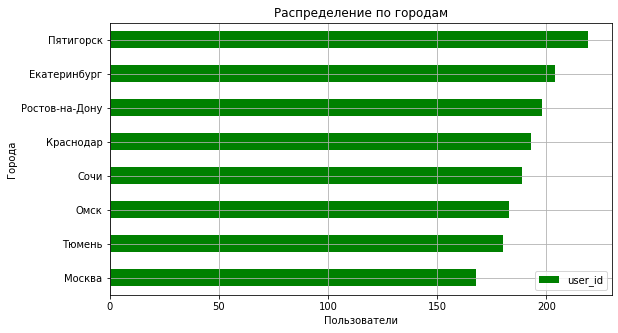

,user_id
city,
Пятигорск,219
Екатеринбург,204
Ростов-на-Дону,198
Краснодар,193
Сочи,189
Омск,183
Тюмень,180
Москва,168


In [20]:
data_users_city = data_users.pivot_table(index = 'city', values = 'user_id', aggfunc = 'count')
data_users_city = data_users_city.sort_values(by='user_id', ascending = True)
data_users_city.plot( kind='barh', figsize = (9,5), grid = True, color='green')
plt.title('Распределение по городам')
plt.xlabel('Пользователи')
plt.ylabel('Города')
plt.show()
display(data_users_city.sort_values(by='user_id', ascending = False))

**Вывод:**

- датафрейм содержит данные о пользователях 8-ми городов;
- больше всего пользователей из Пятигорска (219), меньше всего из Москвы (168);

<a id="s3p3"></a>
### 3.2 Соотношение пользователей с подпиской и без

In [21]:
data_users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


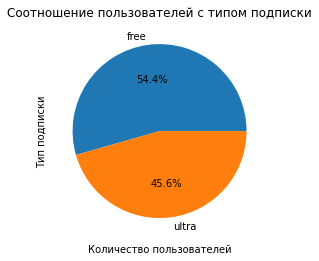

,subscription_type,user_id
0,free,835
1,ultra,699


In [22]:
data_users_subs = data_users.pivot_table(index = 'subscription_type', values = 'user_id', aggfunc = 'count').reset_index()
fig1, ax1 = plt.subplots()
ax1.pie(data_users_subs['user_id'], labels=data_users_subs['subscription_type'], autopct='%1.1f%%')

plt.title('Соотношение пользователей с типом подписки')
plt.xlabel('Количество пользователей')
plt.ylabel('Тип подписки')
plt.show()
display(data_users_subs)

Пользователей без подписки (**54.4%**) больше чем больше чем пользователей с подпиской Ultra (**45.6%**)

<a id="s3p4"></a>
### 3.3 Возраст пользователей

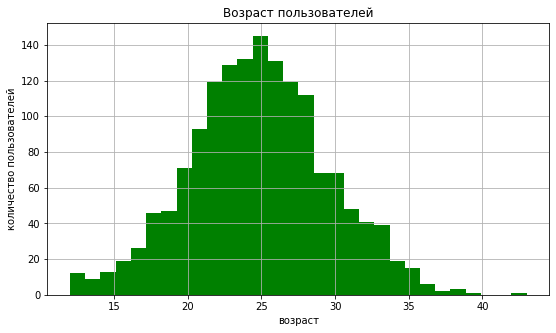

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

In [23]:
data_users['age'].plot(kind = 'hist', grid=True, figsize = (9,5), bins = 30, color='green')
plt.title('Возраст пользователей')
plt.xlabel('возраст')
plt.ylabel('количество пользователей')
plt.show()
data_users['age'].describe()

Выборка имеет нормальное распределение. Медиана и средний возраст почти совпадают: 25 и 24.9 лет соответственно.

<a id="s3p5"></a>
### 3.4 Расстояние, которое пользователь преодолел за одну поездку

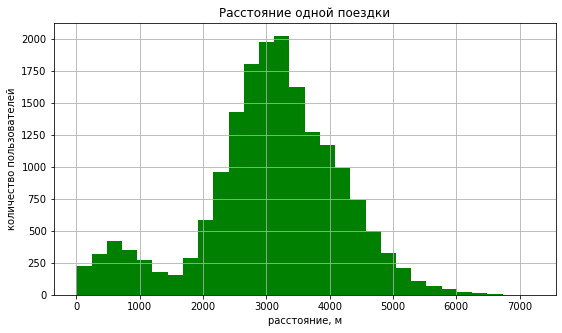

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

In [24]:
data_rides['distance'].plot(kind = 'hist', grid=True, figsize = (9,5), bins = 30, color='green')
plt.title('Расстояние одной поездки')
plt.xlabel('расстояние, м')
plt.ylabel('количество пользователей')
plt.show()
data_rides['distance'].describe()

Среднее расстояние большинства поездок чуть больше 3-х километров. Есть небольшой всплеск около поездок на 600м, можно предположить что эти поезки совершали пользователи, что бы добраться до станций метро или других остановок общественно транспорта.

<a id="s3p6"></a>
### 3.5 Продолжительность поездок

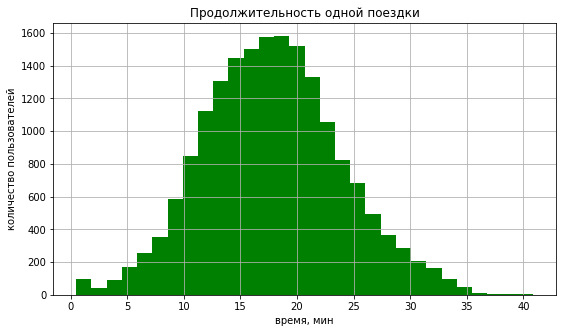

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

In [25]:
data_rides['duration'].plot(kind = 'hist', grid=True, figsize = (9,5), bins = 30, color='green')
plt.title('Продолжительность одной поездки')
plt.xlabel('время, мин')
plt.ylabel('количество пользователей')
plt.show()
data_rides['duration'].describe()

Выборка также похожа на распределение Гаусса. Среднее время поездки 17.7 мин

<a id="s4p1"></a>
## Шаг 4. Объединение данных

<a id="s4p2"></a>
### 4.1 Объединим данные о пользователях, поездках и подписках в один датафрейм.

In [26]:
data_mrg = data_rides.copy()
data_mrg = data_mrg.merge(data_users, how = 'left', on = 'user_id' )
data_mrg = data_mrg.merge(data_sub, how = 'left', on='subscription_type')
display(data_mrg)

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04,11,Альберт,25,Краснодар,free,8,50,0
18064,1534,2840.423057,21.409799,2021-11-16,11,Альберт,25,Краснодар,free,8,50,0
18065,1534,3826.185507,18.435051,2021-11-18,11,Альберт,25,Краснодар,free,8,50,0
18066,1534,2902.308661,16.674362,2021-11-27,11,Альберт,25,Краснодар,free,8,50,0


<a id="s4p3"></a>
### 4.2 Создадим новые датафреймы с пользователями с подпиской и без

Создадим датафрейм с пользователями без подписки

In [27]:
data_mrg_free = data_mrg[data_mrg['subscription_type'] == 'free']
display(data_mrg_free.head())
print('Количество строк в датасете df_mrg_free:', data_mrg_free.shape[0])

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
6500,700,2515.690719,14.944286,2021-01-02,1,Айдар,22,Омск,free,8,50,0
6501,700,846.932642,16.234663,2021-02-01,2,Айдар,22,Омск,free,8,50,0
6502,700,4004.434142,20.016628,2021-02-04,2,Айдар,22,Омск,free,8,50,0
6503,700,1205.911290,9.782872,2021-02-10,2,Айдар,22,Омск,free,8,50,0
6504,700,3047.379435,17.427673,2021-02-14,2,Айдар,22,Омск,free,8,50,0


Количество строк в датасете df_mrg_free: 11568


Создадим датафрейм с пользователями с подпиской

In [28]:
data_mrg_ultra = data_mrg[data_mrg['subscription_type'] == 'ultra']
display(data_mrg_ultra.head())
print('Количество строк в датасете df_mrg_ultra:', data_mrg_ultra.shape[0])

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


Количество строк в датасете df_mrg_ultra: 6500


<a id="s4p4"></a>
### 4.3 Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий

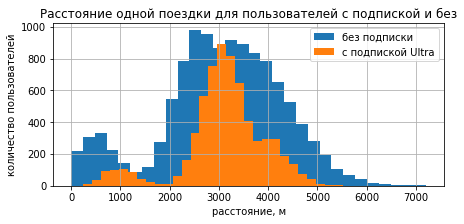

In [29]:
ax = data_mrg_free['distance'].plot(kind = 'hist', grid=True, figsize = (7,3), bins = 30, label='без подписки')
ax = data_mrg_ultra['distance'].plot(kind = 'hist', grid=True, figsize = (7,3), bins = 30, label='с подпиской Ultra')
plt.title('Расстояние одной поездки для пользователей с подпиской и без')
plt.xlabel('расстояние, м')
plt.ylabel('количество пользователей')
plt.legend(loc='upper right')
plt.show()

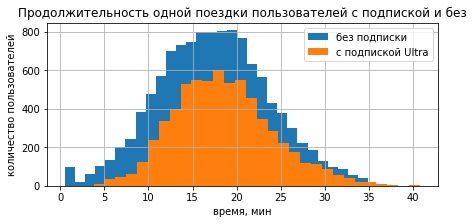

In [30]:
data_mrg_free['duration'].plot(kind = 'hist', grid=True, figsize = (7,3), bins = 30, label='без подписки')
data_mrg_ultra['duration'].plot(kind = 'hist', grid=True, figsize = (7,3), bins = 30, label='с подпиской Ultra')
plt.title('Продолжительность одной поездки пользователей с подпиской и без')
plt.xlabel('время, мин')
plt.ylabel('количество пользователей')
plt.legend(loc='upper right')
plt.show()

**Вывод**

Объединили 3 датафрейма в один общий. 

Создали еще два датафрейма с данными о пользователях с подпиской и без подписки.

По двум датафреймам видим, что поездок без подписки (**11568**) почти в 2 раза больше чем с подпиской (**6500**)

На сравнительных графиках видим разницу в расстоянии и времени поездок в двух категориях пользователей:
   - пользователи без подписки чаще совершают короткие поездки до 500 метров, в то время как пик коротких поездок у пользователей с подпиской составляет 1000 метров
   - у пользователей без подписки есть короткий пик времени до 2 минут, что характерно при бесплатном старте пользователь может совершить короткую поездку за небольшую плату в 16 рублей
   - у пользователей с подпиской время пользования распределено нормально с медианой в 17.5 минут

<a id="s5p1"></a>
## Шаг 5. Подсчёт выручки

<a id="s5p2"></a>
### 5.1 найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц

In [31]:
# округлим время поезки до следующего целого числа
data_mrg['duration'] = np.ceil(data_mrg['duration'])
data_mrg['duration'] = data_mrg['duration'].astype('int')

data_mrg_agg = data_mrg.pivot_table(index= ['user_id', 'month'], values = ['distance', 'duration'], aggfunc = ['count', 'sum'])
data_mrg_agg.columns = ['_'.join(col) for col in data_mrg_agg.columns.values]
data_mrg_agg = data_mrg_agg.drop(columns=['count_duration'])
data_mrg_agg = data_mrg_agg.reset_index()
display(data_mrg_agg)

,user_id,month,count_distance,sum_distance,sum_duration
0,1,1,2,7027.511294,42
1,1,4,1,754.159807,7
2,1,8,2,6723.470560,46
3,1,10,2,5809.911100,32
4,1,11,3,7003.499363,56
...,...,...,...,...,...
11326,1534,6,2,3409.468534,26
11327,1534,8,2,7622.453034,48
11328,1534,9,1,4928.173852,23
11329,1534,11,4,13350.015305,78


- `count_distance` - количество поездок за месяц
- `sum_distance` - общая дистанция за месяц
- `sum_duration` - общая продолжительность поездок за месяц

<a id="s5p3"></a>
### 5.2 Добавляем столбец с помесячной выручкой, которую принёс каждый пользователь

In [32]:
data_mrg_agg = data_mrg_agg.merge(data_users, how='left', on='user_id')
data_mrg_agg = data_mrg_agg.merge(data_sub, how = 'left', on='subscription_type')
display(data_mrg_agg)

,user_id,month,count_distance,sum_distance,sum_duration,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,1,2,7027.511294,42,Кира,22,Тюмень,ultra,6,0,199
1,1,4,1,754.159807,7,Кира,22,Тюмень,ultra,6,0,199
2,1,8,2,6723.470560,46,Кира,22,Тюмень,ultra,6,0,199
3,1,10,2,5809.911100,32,Кира,22,Тюмень,ultra,6,0,199
4,1,11,3,7003.499363,56,Кира,22,Тюмень,ultra,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
11326,1534,6,2,3409.468534,26,Альберт,25,Краснодар,free,8,50,0
11327,1534,8,2,7622.453034,48,Альберт,25,Краснодар,free,8,50,0
11328,1534,9,1,4928.173852,23,Альберт,25,Краснодар,free,8,50,0
11329,1534,11,4,13350.015305,78,Альберт,25,Краснодар,free,8,50,0


In [33]:
# Добавляем столбец с помесячной выручкой, которую принёс каждый пользователь
def gain(row):
    gain_sum = 0
    gain_sum = (row['start_ride_price'] * row['count_distance'] +
              row['minute_price'] * row['sum_duration'] +
              row['subscription_fee']
              )
    return gain_sum

data_mrg_agg['gain'] = data_mrg_agg.apply(gain, axis=1)
display(data_mrg_agg[['user_id', 'name', 'month', 'gain']])

,user_id,name,month,gain
0,1,Кира,1,451
1,1,Кира,4,241
2,1,Кира,8,475
3,1,Кира,10,391
4,1,Кира,11,535
...,...,...,...,...
11326,1534,Альберт,6,308
11327,1534,Альберт,8,484
11328,1534,Альберт,9,234
11329,1534,Альберт,11,824


<a id="s6p1"></a>
## Шаг 6. Проверка гипотез

<a id="s6p2"></a>
### 6.1 Сравним две выборки, data_mrg_free и data_mrg_ultra и проверим гипотезы

Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

- Нулевая гипотеза: среднее время поездок пользователей с подпиской и пользователей без подписки равны
- Альтернативная гипотеза: пользователи с подпиской тратят больше времени

In [34]:
alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(data_mrg_ultra['duration'], data_mrg_free['duration'], alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


Гипотеза верна: среднее время поездок пользователей с подпиской больше время поездок пользователей без подписки

In [35]:
# проверка
print('Среднее время поездки пользователей c подпиской:', round(data_mrg_ultra['duration'].mean(),2))
print('Среднее время поездки пользователей без подписки:', round(data_mrg_free['duration'].mean(),2))

Среднее время поездки пользователей c подпиской: 18.54
Среднее время поездки пользователей без подписки: 17.39


<a id="s6p3"></a>
### 6.2 Расстояние одной поездки в 3130 метров — оптимальное ?

Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.

Проверим гипотезы:

- Нулевая гипотеза: среднее расстояние поездки пользователи с подпиской равна 3130 метрам
- Альтернативная гипотеза: подписчики в среднем проезжают расстояние больше оптимального"

In [36]:
interested_value = 3130 

alpha = 0.05

results = st.ttest_1samp(data_mrg_ultra['distance'], interested_value, alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


In [37]:
print('Средняя дистанция поездки пользователей c подпиской:', round(data_mrg_ultra['distance'].mean(),0))

Средняя дистанция поездки пользователей c подпиской: 3115.0


Не получилось опровергнуть нулевую гипотезу, пользователи не превышают оптимальное время поездки в 3110 минут

<a id="s6p4"></a>
### 6.3 Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки

Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.

- Нулевая гипотеза: помесячная выручка от пользователей с подпиской и без равны.
- Альтернативная гипотеза: помесячная выручка от пользователей с подпиской выше чем выручка от пользователей без подписки

In [38]:
# создадим две выборки с посчитанной помесячной выручкой
data_mrg_agg_ultra = data_mrg_agg[data_mrg_agg['subscription_type'] == 'ultra']
data_mrg_agg_free = data_mrg_agg[data_mrg_agg['subscription_type'] == 'free']

alpha = 0.05 

results = st.ttest_ind(data_mrg_agg_ultra['gain'], data_mrg_agg_free['gain'], alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


Полученное значение p-value меньше заданного уровня значимости, поэтому можно отвергнуть нулевую гипотезу. Есть основания говорить, что помесячная выручка от пользователи с подпиской больше.

In [39]:
# проверка
print('Средняя помесячная выручка от пользователи с подпиской:', round(data_mrg_agg_ultra['gain'].mean(),2))
print('Средняя помесячная выручка от пользователи без подписки:', round(data_mrg_agg_free['gain'].mean(),2))

Средняя помесячная выручка от пользователи с подпиской: 362.79
Средняя помесячная выручка от пользователи без подписки: 328.64


Альтернативная гипотеза верна и пользователи с подпиской приносят ежемесячно больше денег пользователей без подписки.

**Вывод**

Исследование проводилось на выборке из 1534 пользователей с подпиской и без, из 8 разных городов.

Среднее время поездки **17.7 мин**

Из них:
   - Пользователей без подписки (**54.4%**) больше чем больше чем пользователей с подпиской Ultra (**45.6%**)
   - При этом, пользователей из Москвы было меньше всего


В ходе анализа нужно было подтвердить следующие гипотезы:

 1. тратят ли пользователи с подпиской больше времени на поездки?
 2. расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?
 3. помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?

В первом случае, гипотеза оказалась верна: среднее время поездок пользователей с подпиской больше время поездок пользователей без подписки.
   - Среднее время поездки пользователей c подпиской: **18.54**
   - Среднее время поездки пользователей без подписки: **17.39**

Во втором случае не получилось опровергнуть нулевую гипотезу, пользователи не превышают оптимальное время поездки в 3110 минут.
   - Средняя дистанция поездки пользователей c подпиской: **3115.0 м**
   
В третьем случае альтернативная гипотеза оказалась верна и пользователи с подпиской приносят ежемесячно больше денег пользователей без подписки.
   - Средняя помесячная выручка от пользователи с подпиской: **362.79**
   - Средняя помесячная выручка от пользователи без подписки: **328.64**